In [1]:
cd /Users/rodrickleary/Downloads/Datasets\ for\ Thinkful\ Capstone/Sports

/Users/rodrickleary/Downloads/Datasets for Thinkful Capstone/Sports


## Data

I will be working with the Premier League Data from the 2016-17 season. This data was released on Kaggle, representing data presented on whoscored.com that was collected by Opta sports, eNetPulse, and Getty Images.

This data represents one full season worth of data for the English Premier League.

This data consists of one table. This table contains a date, full time goal difference, full time goals conceded, full time goals scored, full time result, half time goal difference, half time goals conceded, half time goals scored, half time result, whether the team was playing a home match, match id, opponent name, team name, team rating, aggregated points, aggregated goals scored, aggregated goals conceded, aggregated goal difference, game number, and standing for each match included in the data set.

1. Do home teams perform better than road teams?

Let's first start with the question about whether teams perform to different levels depending on whether they are playing at home or on the road.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('premier_league_2016_2017.csv')

In [3]:
q1 = matches.groupby('is_home_match', as_index=False)['team_rating'].mean()

In [4]:
print(q1)

   is_home_match  team_rating
0          False     6.740464
1           True     6.874772


([<matplotlib.axis.XTick at 0x11e8685c0>,
 <a list of 2 Text xticklabel objects>)

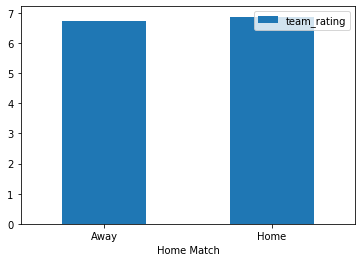

In [5]:
q1.plot.bar(x= 'is_home_match')
plt.xlabel('Home Match')
plt.xticks(np.arange(2), ['Away', 'Home'], rotation=0)


So the mean and the plot appear to indicate that home teams have slightly better team ratings than road teams. However, as you can see from the plot, the averages of these two conditions are extremely close. 

Due to this small gap, I feel that it is worth evaluating whether or not the difference between home and road performances are statistically significant.

In [6]:
from scipy.stats import ttest_ind
Away = matches[matches['is_home_match'] == False]['team_rating']
Home = matches[matches['is_home_match'] == True]['team_rating']
ttest_ind(Away, Home)   

Ttest_indResult(statistic=-4.989135505437621, pvalue=7.526462885601885e-07)

The results of an independent samples t-test indicate that home teams have significantly higher team ratings than away teams.

2. What is the relationship between results and team performances? Do home teams get better results than road teams?

Now that we know that home teams have higher average team ratings than road teams, let's look at the relationship between results and team ratings.

In [7]:
q2 = matches.groupby('full_time_result', as_index=False)['team_rating'].mean()

In [8]:
print(q2)

  full_time_result  team_rating
0             lose     6.454313
1              tie     6.797961
2              win     7.166404


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

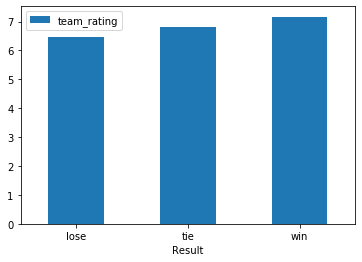

In [9]:
q2.plot.bar(x= 'full_time_result')
plt.xlabel('Result')
plt.xticks(rotation=0)

These results indicate that teams who win have higher team ratings than teams who tie who, in turn, have higher team ratings than teams who lose.

Now that we know that home teams have higher team ratings than road teams and higher team ratings are linked to better results, let's put these findings together to answer the next question, Do home teams get better results than road teams?

Text(0, 0.5, 'Home')

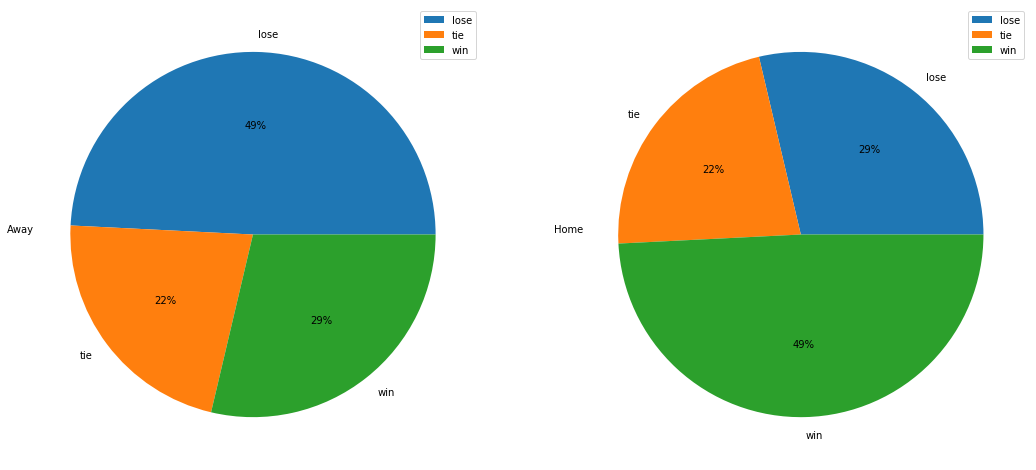

In [10]:
q2sum = matches.groupby(['full_time_result', 'is_home_match']).size().unstack(fill_value=0)
ax = q2sum.plot.pie(subplots=True,figsize=(18, 12), autopct='%1.0f%%')
ax[0].set_ylabel('Away', rotation=0)
ax[1].set_ylabel('Home', rotation=0)

This plot indicates that while home and road teams accumuluate a similar amount of ties over the course of a season, home teams win more games than road teams and lose fewer games than road teams. In other words, home teams get better results than road teams.

This finding maps on to our previous findings since we know that home teams are more likely to have higher team ratings than road teams and higher team ratings are linked to better results.

3. How does team performance vary within a season? Which game are teams most likely to put in their best performance? Which game are teams most likely to put in their worst performance?

Now that we know that results and performances are linked, let's look at home much team ratings naturally ebb and flow over the course of a season.

In [11]:
matches.groupby('game_no', as_index=False)['team_rating'].mean()

,game_no,team_rating
0,1,6.776521
1,2,6.843478
2,3,6.844646
3,4,6.811132
4,5,6.816957
5,6,6.784753
6,7,6.848799
7,8,6.825011
8,9,6.865993
9,10,6.845423


Looking at the mean of indivual game  all of the numbers appear to be pretty close together. Let's plot this same data and see how it appears.

Text(0, 0.5, 'Team Rating')

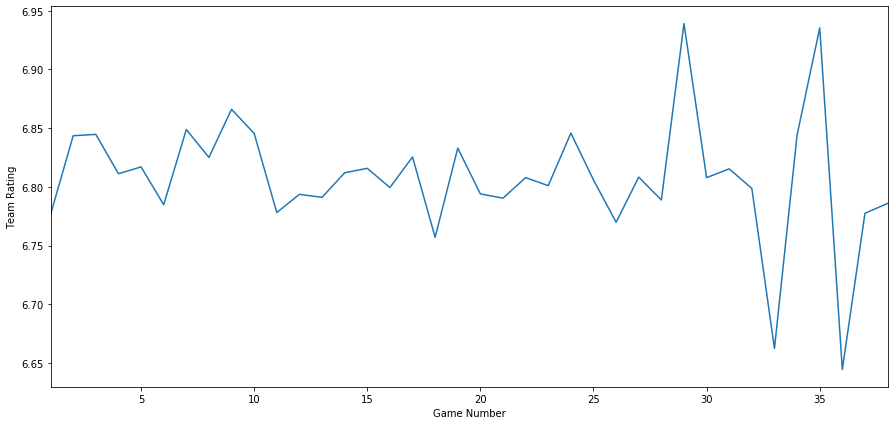

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
matches.groupby(['game_no']).mean()['team_rating'].plot(ax=ax)
plt.xlabel('Game Number')
ax.set_ylabel('Team Rating')

This line graph makes the data alot clearer to look at. Team ratings tend to stay between 6.8 and 6.85 throughout most of the season. However, two things are noticeable from this plot that are not immediately evident when looking at the table of means. The first is that average team ratings appear to be highest at games 29 and 35, and the second is that average team ratings appeart to be lowest at games 33 and 36.

## Future Directions

Despite a lot of interesting findings that have been discovered in this data set, there are still plenty of future questions that were left unanswered due to the scope of this project. First, future analysis should seek to replicate these findings with data sets from other soccer seasons not only in England, but in other countries as well. One of the most striking reasons for this based on the information presented in this report is that despite the relatively small gap in team ratings, around 0.13, a statistically significant difference was detected between the team ratings of home teams and road teams. One possible explanation for this is sample size. Data from all 760 matches from the 2016-17 premier league season was included in this data set. One of the drawbacks of large sample sizes is that they are more likely to result in a type 1 error, or false positive. In order to ensure the findings from question 1 were not the result of a false positive, it is important that these results be replicated with other data sets.

Next, future analysis should look to evaluate whether or not their are signficant differences in team ratings based on the result of the match. The analysis done in question one would lead one to hypothesize that there are significant differences in team ratings based on results. However, without a test for significance, it is impossible to say if the means of the average team ratings based on results fall outside of the expected deviation and are truly different from one another. 

Lastly, future analysis should be done to evaluate why the average team ratings for teams appear to be higher at games 29 and 35, and lower at games 33 and 36. Future analysis should seek to discover if this is the result of teams in general having higher or lower ratings in these specific games or if there are outlier team ratings that are skewing the means of the entire league at these data points.